In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df=pd.read_csv("Ques_2_crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
#filter data for northern states
northern_states = ["Punjab","Haryana","Uttar Pradesh","Bihar","Himachal Pradesh"]
df_north=df[df['State_Name'].isin(northern_states)]

In [5]:
# extract wheat and maize data
df_wheat_maize = df_north[df_north['Crop'].isin(["Wheat", "Maize"])]

In [6]:
# clean and preprocess
# Handle missing values
df_wheat_maize = df_wheat_maize.dropna(subset=['Production'])

df_wheat_maize['Production'] = pd.to_numeric(df_wheat_maize['Production'], errors='coerce')

In [7]:
# CALCULATE TOTAL AND AVERAGE PRODUCTION
# Group by crop
production_stats = df_wheat_maize.groupby('Crop')['Production'].agg(['sum','mean']).reset_index()
print(production_stats)

    Crop          sum           mean
0  Maize   71031540.0   14144.074074
1  Wheat  992630659.0  360825.394039


In [22]:
#STEP-1 Calculate dominance
# Group by crop and calculate total production
dominance = df_wheat_maize.groupby('Crop')['Production'].sum().reset_index()

print("Total Production Comparison:\n", dominance)

Total Production Comparison:
     Crop   Production
0  Maize   71031540.0
1  Wheat  992630659.0


In [23]:
#STEP-2 Compare wheat vs maize
# Check which crop is dominant
wheat_total = dominance.loc[dominance['Crop']=="Wheat", 'Production'].values[0]
maize_total = dominance.loc[dominance['Crop']=="Maize", 'Production'].values[0]

if wheat_total > maize_total:
    print("Observation: Wheat is more dominant in northern states, especially Punjab, Haryana, and Uttar Pradesh.")
else:
    print("Observation: Maize shows higher dominance, particularly in Bihar.")

Observation: Wheat is more dominant in northern states, especially Punjab, Haryana, and Uttar Pradesh.


In [8]:
#STEP-3 State wise comparison
#Calculate total and average production of wheat vs maize in the selected states.
statewise = df_wheat_maize.groupby(['State_Name','Crop'])['Production'].sum().reset_index()
print(statewise)

         State_Name   Crop   Production
0             Bihar  Maize   32232829.0
1             Bihar  Wheat   81020206.0
2           Haryana  Maize     556200.0
3           Haryana  Wheat  158647000.0
4  Himachal Pradesh  Maize    7813360.0
5  Himachal Pradesh  Wheat    6105703.0
6            Punjab  Maize    8052000.0
7            Punjab  Wheat  276946000.0
8     Uttar Pradesh  Maize   22377151.0
9     Uttar Pradesh  Wheat  469911750.0


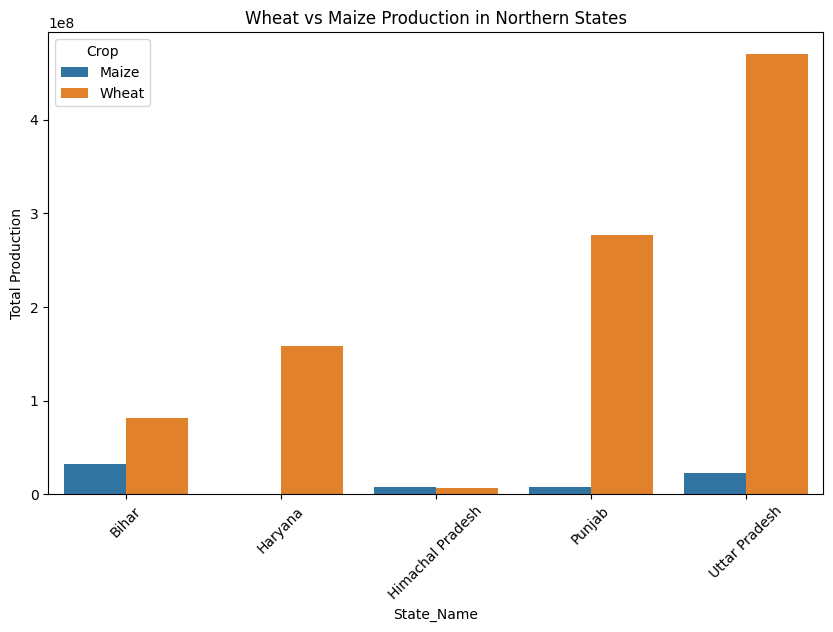

In [9]:
#Visualize crop production trends using bar/line charts.
plt.figure(figsize=(10,6))
sns.barplot(data=statewise, x='State_Name', y='Production', hue='Crop')
plt.title("Wheat vs Maize Production in Northern States")
plt.ylabel("Total Production")
plt.xticks(rotation=45)
plt.show()

C:\Users\Akrit\AppData\Local\Temp\ipykernel_15068\2845595634.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_wheat_maize, x='Crop_Year', y='Production', hue='Crop', ci=None)


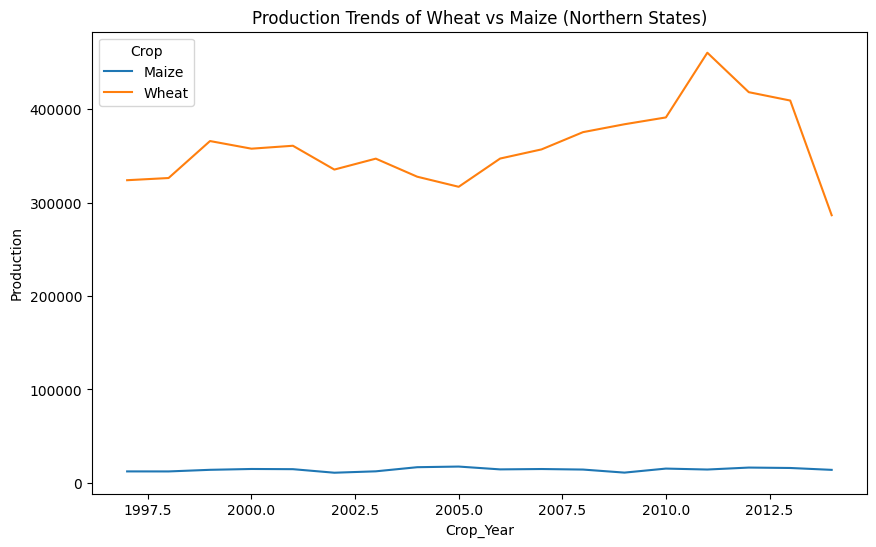

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_wheat_maize, x='Crop_Year', y='Production', hue='Crop', ci=None)
plt.title("Production Trends of Wheat vs Maize (Northern States)")
plt.ylabel("Production")
plt.show()